# <center>[tt]

In [395]:
import numpy as np
import matplotlib.pyplot as plt

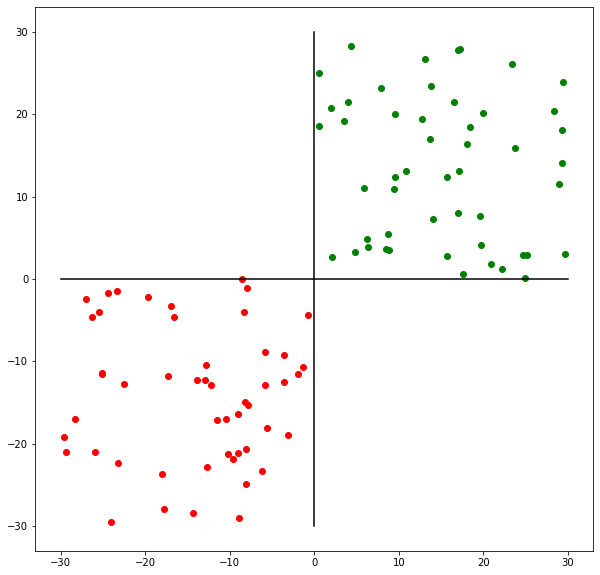

In [510]:
nofp = 100
center1=[15,15]
center2=[-15,-15]
spread =30

np.random.seed(0)
points  = (np.random.rand(nofp,2)-0.5)*spread
points[:nofp//2] = points[:nofp//2]+center1
points[nofp//2:] = points[nofp//2:]+center2
#labels=(nofp//2)*[1]+(nofp//2)*[0]

plt.figure(figsize=(10,10))
plt.scatter(points[:nofp//2,0],points[:nofp//2,1],c="green")
plt.scatter(points[nofp//2:,0],points[nofp//2:,1],c="red")
plt.plot([0,0],[-30,30],c="k")
plt.plot([-30,30],[0,0],c="k")

## Creating an affinity graph base on the Knn

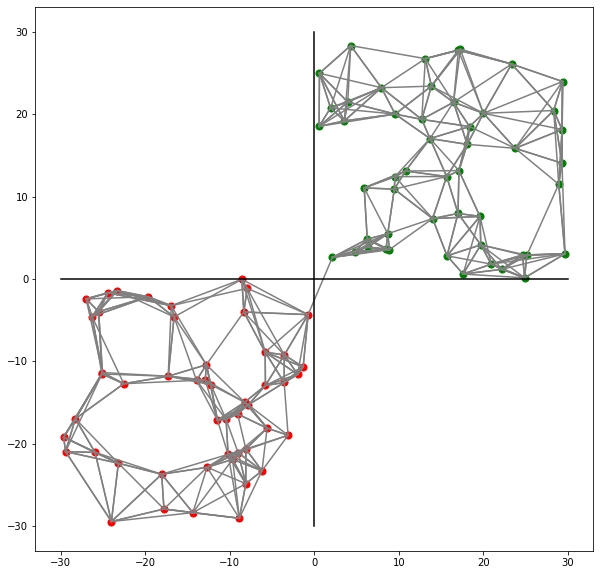

In [517]:
from sklearn.neighbors import NearestNeighbors
neighbors = 7
knn = NearestNeighbors(n_neighbors=neighbors+1) #+1 because the first wiil be the same point
knn.fit(points)
[distances,closest] = knn.kneighbors(points)

nofPoints = points.shape[0]

plt.figure(figsize=(10,10))
for p in range(nofPoints):
    for n in range(1,neighbors):
        plt.plot([points[p][0],points[closest[p][n]][0]],[points[p][1],points[closest[p][n]][1]],c='gray')
        
plt.scatter(points[:nofp//2,0],points[:nofp//2,1],c="green",s=50)
plt.scatter(points[nofp//2:,0],points[nofp//2:,1],c="red",s=50)
plt.plot([0,0],[-30,30],c="k")
plt.plot([-30,30],[0,0],c="k")

## Generating the Adjacency Matrix [A]

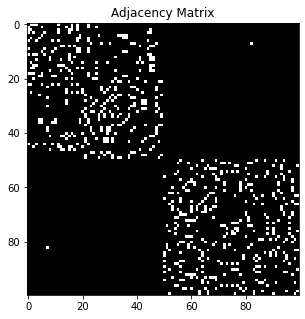

In [518]:
nofPoints = points.shape[0]
A = np.zeros((nofPoints,nofPoints))

for i in range(nofPoints):
    A[i,closest[i][1:]] = 1
    #A[closest[i],i] = 1
    
_=plt.figure(figsize=(5,5))
_=plt.imshow(A,cmap="gray",interpolation="none")
_=plt.title("Adjacency Matrix")

## Generating the degree matrix [D]

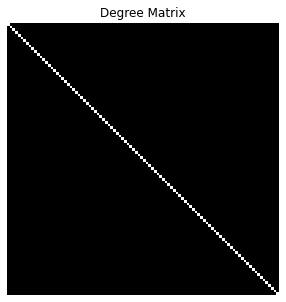

In [519]:
D = np.diag(A.sum(axis=1))
    
_=plt.figure(figsize=(5,5))
_=plt.imshow(D,cmap="gray",interpolation="none")
_=plt.title("Degree Matrix")
_=plt.axis("off")

## Generating the Laplasian Matric

C:\Users\tilem\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


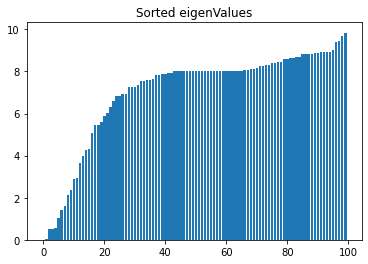

In [520]:
nofPoints = points.shape[0]

L = D-A

vals, vecs = np.linalg.eig(L)
vecs = vecs.T

order = np.argsort(vals)
vecs  = vecs[order]
vals  = vals[order]

# use Fiedler value to find best cut t
_=plt.bar(range(nofPoints),vals)
_=plt.title("Sorted eigenValues")

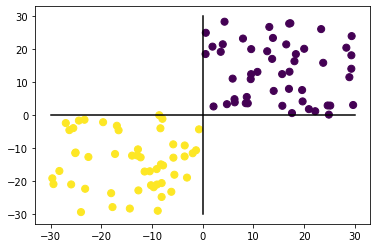

In [521]:
clusters = vecs[1] > 0

plt.scatter(points[:,0],points[:,1],c=clusters,s=50)
plt.plot([0,0],[-30,30],c="k")
plt.plot([-30,30],[0,0],c="k")

## Generating an affinity matrix using Eucledian distane as a metric

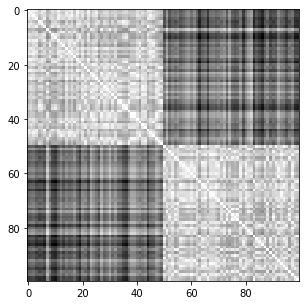

In [522]:
nofPoints = points.shape[0]
affinities = np.zeros((nofPoints,nofPoints))

for p in range(nofPoints): #for each point
    for n in range(nofPoints):# for all neighbouring points
        affinities[p,n]=np.linalg.norm(points[p] - points[n])
        
affinities = affinities.max() - affinities

plt.figure(figsize=(5,5))
plt.imshow(affinities,cmap="gray",interpolation="none")